# Importación de librerias

In [33]:
import os
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import pandas as pd
import geopandas as gpd
import fiona
import numpy as np
from shapely.geometry import mapping, shape
from osgeo import gdal, ogr, osr
from glob import glob

# Acceso al raster de sentinel

In [67]:
sentinal_fp = "./sentinel-2/S2B_2022/"
# find every file in the sentinal_fp directory
bands = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08']
sentinal_band_paths = [os.path.join(sentinal_fp, f) for f in os.listdir(
    sentinal_fp) if os.path.isfile(os.path.join(sentinal_fp, f)) and f[26:-4] in bands]
sentinal_band_paths.sort()
sentinal_band_paths

['./sentinel-2/S2B_2022/RT_T17MQR_20221202T153619_B01.tif',
 './sentinel-2/S2B_2022/RT_T17MQR_20221202T153619_B02.tif',
 './sentinel-2/S2B_2022/RT_T17MQR_20221202T153619_B03.tif',
 './sentinel-2/S2B_2022/RT_T17MQR_20221202T153619_B04.tif',
 './sentinel-2/S2B_2022/RT_T17MQR_20221202T153619_B05.tif',
 './sentinel-2/S2B_2022/RT_T17MQR_20221202T153619_B06.tif',
 './sentinel-2/S2B_2022/RT_T17MQR_20221202T153619_B07.tif',
 './sentinel-2/S2B_2022/RT_T17MQR_20221202T153619_B08.tif']

In [15]:
landsat_fp = "./LC08_L1TP_010063_20211204_20211214_01_T1/"
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'QA']
landsat_band_paths = []

for f in os.listdir(landsat_fp):
    if f[-6:-4] in bands:
        aux = os.path.join(landsat_fp, f)
        landsat_band_paths.append(aux)
landsat_band_paths.sort()
landsat_band_paths

['./LC08_L1TP_010063_20211204_20211214_01_T1/LC08_L1TP_010063_20211204_20211214_01_T1_B1.TIF',
 './LC08_L1TP_010063_20211204_20211214_01_T1/LC08_L1TP_010063_20211204_20211214_01_T1_B2.TIF',
 './LC08_L1TP_010063_20211204_20211214_01_T1/LC08_L1TP_010063_20211204_20211214_01_T1_B3.TIF',
 './LC08_L1TP_010063_20211204_20211214_01_T1/LC08_L1TP_010063_20211204_20211214_01_T1_B4.TIF',
 './LC08_L1TP_010063_20211204_20211214_01_T1/LC08_L1TP_010063_20211204_20211214_01_T1_B5.TIF',
 './LC08_L1TP_010063_20211204_20211214_01_T1/LC08_L1TP_010063_20211204_20211214_01_T1_B6.TIF',
 './LC08_L1TP_010063_20211204_20211214_01_T1/LC08_L1TP_010063_20211204_20211214_01_T1_B7.TIF',
 './LC08_L1TP_010063_20211204_20211214_01_T1/LC08_L1TP_010063_20211204_20211214_01_T1_BQA.TIF']

In [16]:
landsat_band_paths[0][35:39]

'4_01'

In [17]:
# create a products directory within the data dir which won't be uploaded to Github
img_dir = './data/products/provincia/'

# check to see if the dir it exists, if not, create it
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# filepath for image we're writing out
img_fp = img_dir + f'{landsat_band_paths[0][35:39]}.tif'

# Read metadata of first file and assume all other bands are the same
with rasterio.open(landsat_band_paths[0]) as src0:
    meta = src0.meta

# Update metadata to reflect the number of layers
meta.update(count=len(landsat_band_paths))

# Read each layer and write it to stack
with rasterio.open(img_fp, 'w', **meta) as dst:
    for id, layer in enumerate(landsat_band_paths, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

In [18]:
full_out_image = rasterio.open(img_fp)
img_rows, img_cols = full_out_image.shape
img_bands = full_out_image.count
print(full_out_image.shape)  # dimensions
print(full_out_image.count)  # bands

(7751, 7611)
8


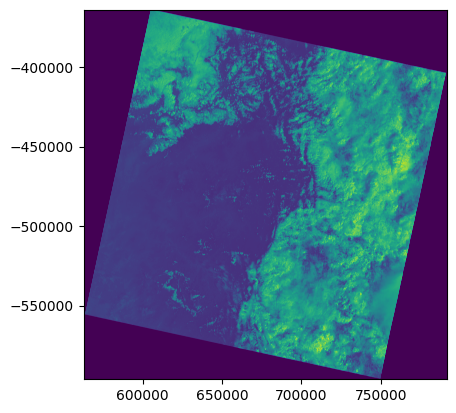

<AxesSubplot: >

In [19]:
show(full_out_image)

In [20]:
full_out_image.close()

In [35]:
import sys
'geopandas' in sys.modules

True

## Obtener el Sistema de Referencia de Coordenadas (CRS)


In [34]:
shapefile = gpd.read_file('./shape/cobertura_terrestre_ecuador/v_ff010_cobertura_vegetal_2018_aPolygon.shp')
shapefile.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry
0,FF010,TIERRA AGROPECUARIA,TIERRA AGROPECUARIA,2018.0,78.66,"POLYGON ((721433.410 9451606.350, 721343.410 9..."
1,FF010,TIERRA AGROPECUARIA,TIERRA AGROPECUARIA,2018.0,2.70,"POLYGON ((699023.410 9451516.350, 698963.410 9..."
2,FF010,CUERPO DE AGUA,NATURAL,2018.0,2.88,"POLYGON ((714023.410 9451456.350, 713993.410 9..."
3,FF010,BOSQUE,BOSQUE NATIVO,2018.0,2.43,"POLYGON ((720773.410 9451456.350, 720713.410 9..."
4,FF010,TIERRA AGROPECUARIA,TIERRA AGROPECUARIA,2018.0,4.68,"POLYGON ((721883.410 9451426.350, 721793.410 9..."


### Ajustar el CRS

In [ ]:
shapefile = shapefile.to_crs(full_out_image.crs)
shapefile.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- lat[north]: Latitude (degree)
- lon[east]: Longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Graficar area de interes

<Axes: >

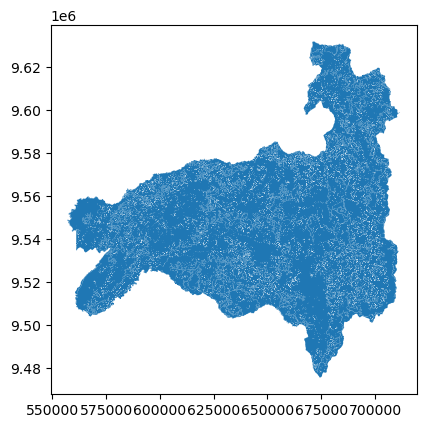

In [4]:
shapefile.plot()

## Cortar bandas por AOI

In [ ]:
rasterBand = rasterio.open(img_fp)
outImage, outTransform = mask(
    dataset=rasterBand, shapes=shapefile.geometry, crop=True)
outMeta = rasterBand.meta
outMeta.update({"driver": 'GTiff',
                "height": outImage.shape[1],
                "width": outImage.shape[2],
                "transform": outTransform
                })
outRaster = rasterio.open("./data/products/canton/clip.tif", "w", **outMeta)
outRaster.write(outImage)
outRaster.close()


(3, 706, 375)


<AxesSubplot: >

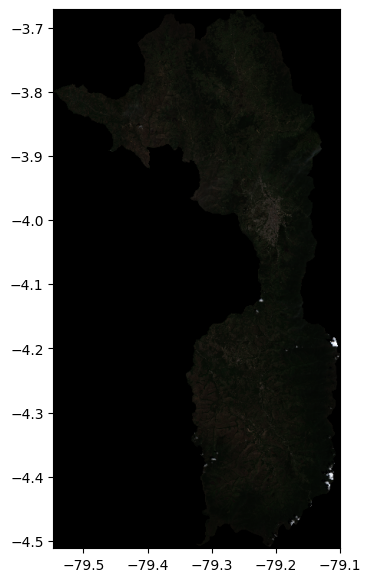

In [ ]:
import matplotlib.pyplot as plt
from rasterio.plot import show

raster = rasterio.open("./data/products/canton/clip.tif")

clipped_img = raster.read([4, 3, 2])
print(clipped_img.shape)
fig, ax = plt.subplots(figsize=(10, 7))
show(clipped_img[:, :, :], ax=ax, transform=raster.transform)


## Numero de clases en el Nivel I

In [5]:
unique, counts = np.unique(shapefile['cobertura_'], return_counts=True)
list(zip(unique, counts))


[('BOSQUE', 3658),
 ('CUERPO DE AGUA', 1106),
 ('OTRAS TIERRAS', 405),
 ('TIERRA AGROPECUARIA', 3371),
 ('VEGETACION ARBUSTIVA Y HERBACEA', 4631),
 ('ZONA ANTROPICA', 323)]

## Numero de clases en el Nivel II

In [6]:
unique, counts = np.unique(shapefile['cobertura0'], return_counts=True)
list(zip(unique, counts))

[('AREA POBLADA', 228),
 ('AREA SIN COBERTURA VEGETAL', 405),
 ('BOSQUE NATIVO', 3099),
 ('INFRAESTRUCTURA', 95),
 ('NATURAL', 1106),
 ('PARAMO', 181),
 ('PLANTACION FORESTAL', 559),
 ('TIERRA AGROPECUARIA', 3371),
 ('VEGETACION ARBUSTIVA', 3543),
 ('VEGETACION HERBACEA', 907)]

## Total de elementos 

In [7]:
shapefile.shape

(13494, 6)

## Eliminar clases del nivel II

In [8]:
def eliminar_clases(shapefile):
    for index, item in enumerate(shapefile['cobertura0']):
        if item == 'NATURAL':
            shapefile.drop(index, axis=0, inplace=True)
        elif item == 'BOSQUE NATIVO':
            shapefile.drop(index, axis=0, inplace=True)
        elif item == 'PLANTACION FORESTAL':
            shapefile.drop(index, axis=0, inplace=True)
        elif item == 'VEGETACION HERBACEA':
            shapefile.drop(index, axis=0, inplace=True)
        elif item == 'PARAMO':
            shapefile.drop(index, axis=0, inplace=True)
    return shapefile.reset_index(drop=True, inplace=True)

In [9]:
eliminar_clases(shapefile)

## Separar por grupos y obtener X numero de muestras por clase

In [10]:
a_poblada = shapefile.groupby('cobertura0').get_group(('AREA POBLADA'))
a_sin_cvegetal = shapefile.groupby('cobertura0').get_group(('AREA SIN COBERTURA VEGETAL'))
infraestructura = shapefile.groupby('cobertura0').get_group(('INFRAESTRUCTURA'))
agropecuaria = shapefile.groupby('cobertura0').get_group(('TIERRA AGROPECUARIA'))
v_arbustiva = shapefile.groupby('cobertura0').get_group(('VEGETACION ARBUSTIVA'))

In [20]:
def clasificar(y):
    
    # Agrupar Vegetación inundada
    y['cobertura0'][y['cobertura0'] == 'AREA POBLADA'] = 0
    y['cobertura0'][y['cobertura0'] == 'AREA SIN COBERTURA VEGETAL'] = 1
    y['cobertura0'][y['cobertura0'] == 'INFRAESTRUCTURA'] = 2
    y['cobertura0'][y['cobertura0'] == 'TIERRA AGROPECUARIA'] = 3
    y['cobertura0'][y['cobertura0'] == 'VEGETACION ARBUSTIVA'] = 4

    return (y)

In [13]:
list_class = gpd.GeoDataFrame(pd.concat([a_poblada, a_sin_cvegetal, infraestructura, agropecuaria, v_arbustiva], ignore_index=True))
list_class.reset_index(drop=True, inplace=True)
list_class.head()

,codigo_de_,cobertura_,cobertura0,anio_de_re,area_super,geometry
0,FF010,ZONA ANTROPICA,AREA POBLADA,2018.0,2.07,"POLYGON ((684533.410 9613036.350, 684503.410 9..."
1,FF010,ZONA ANTROPICA,AREA POBLADA,2018.0,9.45,"POLYGON ((684953.410 9629566.350, 684953.410 9..."
2,FF010,ZONA ANTROPICA,AREA POBLADA,2018.0,4.41,"POLYGON ((673553.410 9627106.350, 673523.410 9..."
3,FF010,ZONA ANTROPICA,AREA POBLADA,2018.0,6.12,"POLYGON ((673193.410 9614836.350, 673193.410 9..."
4,FF010,ZONA ANTROPICA,AREA POBLADA,2018.0,14.40,"POLYGON ((703433.410 9614656.350, 703313.410 9..."


In [21]:
list_class =  clasificar(list_class)

C:\Users\12758\AppData\Local\Temp\ipykernel_7372\3192358304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['cobertura0'][y['cobertura0'] == 'AREA POBLADA'] = 0
C:\Users\12758\AppData\Local\Temp\ipykernel_7372\3192358304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['cobertura0'][y['cobertura0'] == 'AREA SIN COBERTURA VEGETAL'] = 1
C:\Users\12758\AppData\Local\Temp\ipykernel_7372\3192358304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [23]:
np.unique(list_class['cobertura0'])

array([0, 1, 2, 3, 4], dtype=object)

In [24]:
list_class.to_file("clasificado.shp")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 92: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 97: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "c:\Users\12758\anaconda3\envs\landcover-env\lib\site-packages\fiona\env.py", line 289, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 94: invalid continuation byte


## Numero de clases segmentadas

In [ ]:
unique, counts = np.unique(list_class['cobertura0'], return_counts=True)
list(zip(unique, counts))

[('AREA POBLADA', 100),
 ('AREA SIN COBERTURA VEGETAL', 104),
 ('INFRAESTRUCTURA', 27),
 ('TIERRA AGROPECUARIA', 537),
 ('VEGETACION ARBUSTIVA', 1405)]

In [ ]:
list_class.shape


(2173, 6)

## Presentar clases

In [ ]:
from pyproj import Transformer
from pyproj import Proj

# esto obtendrá nuestros cuatro puntos de esquina
raster_gps_points = raster.transform * (0, 0), raster.transform * (raster.width, 0), raster.transform * (
    raster.width, raster.height), raster.transform * (0, raster.height),

# Proyecte todas las longitudes y latitudes usando el paquete pyproj
p1 = Proj(raster.crs)  # nuestro crs actual
p2 = Proj(list_class.crs)  # el crs en el que queremos que esté nuestro ráster
# we could also specifc UTM 18N as:
#   p2 = Proj("+proj=utm +zone=18, +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# pyproj Transformer.transform para convertir las posiciones a largos, lats
transformer = Transformer.from_crs(p1.crs, p2.crs)
UTMx, UTMy = transformer.transform(np.array(raster_gps_points)[
                                   :, 1], np.array(raster_gps_points)[:, 0])

# comprima los puntos para que estén en la forma [ (lat, long), ...]
raster_utm_points = list(zip(UTMx, UTMy))

print('raster bounds in UTM 18N:\n', raster_utm_points, '\n')
print('raster bounds in lat, lon:\n', raster_gps_points)


raster bounds in UTM 18N:
 [(-3.671479994756162, -79.54682306510212), (-3.671479994756162, -79.09940485221149), (-4.511639460036729, -79.09940485221149), (-4.511639460036729, -79.54682306510212)] 

raster bounds in lat, lon:
 ((-79.54682306510212, -3.671479994756162), (-79.09940485221149, -3.671479994756162), (-79.09940485221149, -4.511639460036729), (-79.54682306510212, -4.511639460036729))


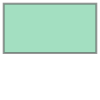

In [ ]:
# podemos hacer una forma Shapely simple fuera de estos límites si queremos
raster_geometry = {
    'type':  'Polygon',
    'coordinates':  [list(raster_utm_points)]
}
raster_shape = shape(raster_geometry)
raster_shape


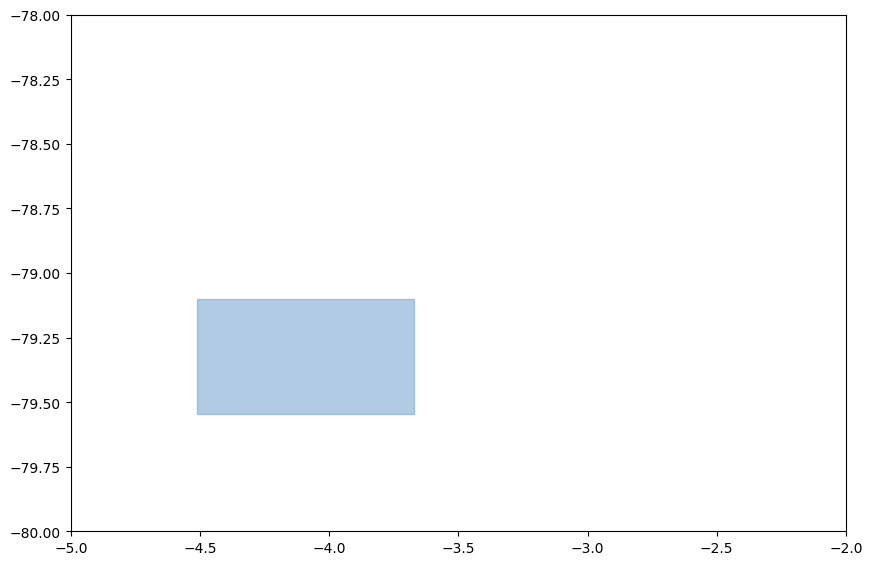

In [ ]:
# this package helps us plot polygons and is used internally by GeoPandas to plot
from descartes import PolygonPatch
import matplotlib.pyplot as plt

BLUE = '#6699cc'
GRAY = '#000000'

fig, ax = plt.subplots(figsize=(10, 10))

# add raster bounds

poly1patch = PolygonPatch(raster_shape, fc=BLUE, ec=BLUE, alpha=0.5)
ax.add_patch(poly1patch)

list_class.plot(ax=ax, color='black')

xrange = [int(min(raster_shape.exterior.xy[0]))-1,
          int(max(raster_shape.exterior.xy[0]))+1]
yrange = [int(min(raster_shape.exterior.xy[1]))-1,
          int(max(raster_shape.exterior.xy[1]))+1]

ax.set_xlim(*xrange)
ax.set_ylim(*yrange)
ax.set_aspect('equal')
plt.show()


## Generar lista de formas

In [ ]:
# Esto genera una lista de geometrías
geoms = list_class.geometry.values

# tomemos una sola geometría bien formada para verificar
geometry = geoms[0]
print(type(geometry))
print(geometry)


<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((-79.26355809769828 -3.7391384894542883, -79.263828146528 -3.739139025746781, -79.26383508279432 -3.7356123544961064, -79.26437517841562 -3.7356134258170046, -79.26437677765936 -3.7347995783291883, -79.26410673007774 -3.734799042827363, -79.26410886218818 -3.733713912975084, -79.26383881497682 -3.7337133775460822, -79.2638382819249 -3.7339846599727715, -79.26356823466973 -3.7339841244215686, -79.26356716828325 -3.7345266891916626, -79.26329712090144 -3.734526153479225, -79.26329658756687 -3.7347974358226206, -79.26302654014125 -3.7347968999879497, -79.26302547318936 -3.7353394645914304, -79.2627554256371 -3.7353389285954823, -79.26275435836342 -3.735881493113883, -79.2630244060814 -3.7358820291878967, -79.26302387246886 -3.7361533114835, -79.26275382466805 -3.7361527753704546, -79.26275275716023 -3.736695339878333, -79.26302280512678 -3.7366958760694473, -79.2630222713972 -3.73696715835979, -79.26329231948567 -3.7369676945066774, -79.

In [ ]:
# transform to GeoJSON format
from shapely.geometry import mapping
# can also do this using polygon.__geo_interface__
feature = [mapping(geometry)]
print(type(feature))
print(feature)


<class 'list'>
[{'type': 'Polygon', 'coordinates': (((-79.26355809769828, -3.7391384894542883), (-79.263828146528, -3.739139025746781), (-79.26383508279432, -3.7356123544961064), (-79.26437517841562, -3.7356134258170046), (-79.26437677765936, -3.7347995783291883), (-79.26410673007774, -3.734799042827363), (-79.26410886218818, -3.733713912975084), (-79.26383881497682, -3.7337133775460822), (-79.2638382819249, -3.7339846599727715), (-79.26356823466973, -3.7339841244215686), (-79.26356716828325, -3.7345266891916626), (-79.26329712090144, -3.734526153479225), (-79.26329658756687, -3.7347974358226206), (-79.26302654014125, -3.7347968999879497), (-79.26302547318936, -3.7353394645914304), (-79.2627554256371, -3.7353389285954823), (-79.26275435836342, -3.735881493113883), (-79.2630244060814, -3.7358820291878967), (-79.26302387246886, -3.7361533114835), (-79.26275382466805, -3.7361527753704546), (-79.26275275716023, -3.736695339878333), (-79.26302280512678, -3.7366958760694473), (-79.2630222713

# Leer raster

In [ ]:
out_image, out_transform = mask(raster, feature, crop=True)
out_image.shape


(8, 5, 3)

In [ ]:
raster.close()


## Construyendo los datos de entrenamiento parascikit-learn

In [ ]:
X = np.array([], dtype=np.int8).reshape(0, 8)  # pixels para entrenamiento
y = np.array([], dtype=np.string_)  # etiquetas para entrenamiento

# extract the raster values within the polygon
with rasterio.open(img_fp) as src:
    band_count = src.count
    for index, geom in enumerate(geoms):
        feature = [mapping(geom)]
        # la función de máscara devuelve una matriz de los píxeles rasterizados dentro de esta característica
        out_image, out_transform = mask(src, feature, crop=True)
        # eliminar todos los píxeles con valores 0 en las 8 bandas, es decir, que no forman parte del shapefile
        out_image_trimmed = out_image[:, ~np.all(out_image == 0, axis=0)]
        # eliminar todos los píxeles con valores 255 para las 8 bandas, es decir, que no forman parte del shapefile
        out_image_trimmed = out_image_trimmed[:, ~np.all(
            out_image_trimmed == 255, axis=0)]
        # redimensionar el arreglo en [pixel count, bands]
        out_image_reshaped = out_image_trimmed.reshape(-1, band_count)
        # añadir las etiquetas a la matriz y
        y = np.append(y, [list_class["cobertura0"][index]]
                      * out_image_reshaped.shape[0])
        # apilar los píxeles en la matriz de píxeles
        X = np.vstack((X, out_image_reshaped))


### Emparejar Y con X

Ahora que tenemos la imagen que queremos clasificar (nuestras entradas de características X) y las etiquetas de cobertura terrestre (nuestros datos etiquetados con y), verifiquemos para asegurarnos de que coincidan en tamaño para que podamos enviarlos a Naive Bayes:

In [ ]:
# ¿Cuáles son nuestras etiquetas de clasificación?
labels = np.unique(shapefile["cobertura0"])
print('The training data include {n} classes: {classes}\n'.format(
    n=labels.size, classes=labels))

# Necesitaremos una matriz "X" que contenga nuestras características, y una matriz "y" que contenga nuestras etiquetas
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))


The training data include 5 classes: ['AREA POBLADA' 'AREA SIN COBERTURA VEGETAL' 'INFRAESTRUCTURA'
 'TIERRA AGROPECUARIA' 'VEGETACION ARBUSTIVA']

Our X matrix is sized: (55473, 8)
Our y array is sized: (55473,)


Text(0.5, 1.0, 'Band Intensities Higher Ref Subset')

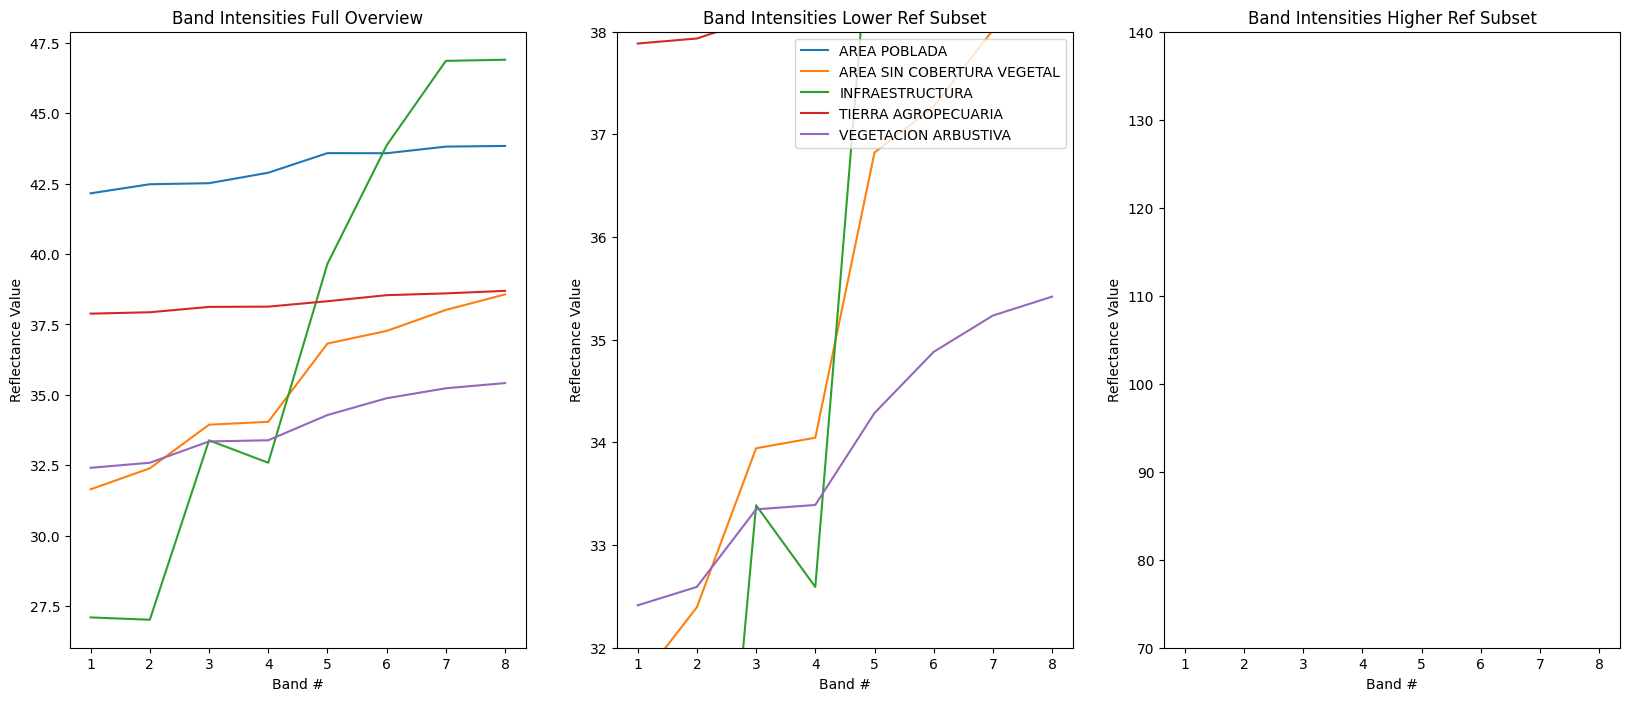

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=[20, 8])

# numeros 1-8
band_count = np.arange(1, 9)

classes = np.unique(y)
for class_type in classes:
    band_intensity = np.mean(X[y == class_type, :], axis=0)
    ax[0].plot(band_count, band_intensity, label=class_type)
    ax[1].plot(band_count, band_intensity, label=class_type)
    ax[2].plot(band_count, band_intensity, label=class_type)
# plot them as lines

# Add some axis labels
ax[0].set_xlabel('Band #')
ax[0].set_ylabel('Reflectance Value')
ax[1].set_ylabel('Reflectance Value')
ax[1].set_xlabel('Band #')
ax[2].set_ylabel('Reflectance Value')
ax[2].set_xlabel('Band #')
# ax[0].set_ylim(32,38)
ax[1].set_ylim(32, 38)
ax[2].set_ylim(70, 140)
# ax.set
ax[1].legend(loc="upper right")
# Add a title
ax[0].set_title('Band Intensities Full Overview')
ax[1].set_title('Band Intensities Lower Ref Subset')
ax[2].set_title('Band Intensities Higher Ref Subset')


In [ ]:
def str_class_to_int(class_array):
    class_array[class_array == 'AREA POBLADA'] = 0
    class_array[class_array == 'AREA SIN COBERTURA VEGETAL'] = 1
    class_array[class_array == 'INFRAESTRUCTURA'] = 2
    class_array[class_array == 'TIERRA AGROPECUARIA'] = 3
    class_array[class_array == 'VEGETACION ARBUSTIVA'] = 4
    return (class_array.astype(int))


# red

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)


GaussianNB()

In [ ]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image


In [ ]:
with rasterio.open("./data/products/canton/clip.tif") as src:
    # may need to reduce this image size if your kernel crashes, takes a lot of memory
    img = src.read()

# Take our full image and reshape into long 2d array (nrow * ncol, nband) for classification
print(img.shape)
reshaped_img = reshape_as_image(img)
print(reshaped_img.shape)


(8, 706, 375)
(706, 375, 8)


In [ ]:
class_prediction = gnb.predict(reshaped_img.reshape(-1, 8))

# Reshape our classification map back into a 2D matrix so we can visualize it
class_prediction = class_prediction.reshape(reshaped_img[:, :, 0].shape)


In [ ]:
class_prediction = str_class_to_int(class_prediction)


In [ ]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors


# find the highest pixel value in the prediction image
n = int(np.max(class_prediction))

# next setup a colormap for our map
colors = dict((
    (0, (233, 209, 249, 255)),   # Gris - AREA POBLADA
    (1, (139, 69, 19, 255)),      # Brown - AREA SIN COBERTURA VEGETAL
    (2, (233, 10, 9, 255)),    # Red - INFRAESTRUCTURA Wetland
    (3, (233, 169, 49, 255)),   # Tan - TIERRA AGROPECUARIA
    (4, (122, 245, 119, 255)),  # Lime - VEGETACION ARBUSTIVA

))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v

index_colors = [colors[key] if key in colors else
                (255, 255, 255, 0) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(
    index_colors, 'Classification', n+1)


C:\Users\12758\AppData\Local\Temp\ipykernel_5556\1384158104.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


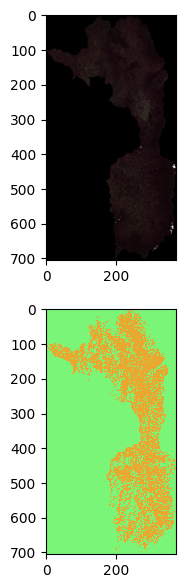

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))

img_stretched = color_stretch(reshaped_img, [4, 3, 2])
axs[0].imshow(img_stretched)

axs[1].imshow(class_prediction, cmap=cmap, interpolation='none')

fig.show()


In [ ]:
with rasterio.open("./data/products/canton/clip.tif") as src:
    green_band = src.read(3)
    red_band = src.read(4)
    nir_band = src.read(8)

ndwi = (green_band.astype(float) - nir_band.astype(float)) / \
    (green_band.astype(float) + nir_band.astype(float))
ndvi = (nir_band.astype(float) - red_band.astype(float)) / \
    (red_band.astype(float) + nir_band.astype(float))


C:\Users\12758\AppData\Local\Temp\ipykernel_5556\2658113090.py:6: RuntimeWarning: invalid value encountered in true_divide
  ndwi = (green_band.astype(float) - nir_band.astype(float)) / (green_band.astype(float) + nir_band.astype(float))
C:\Users\12758\AppData\Local\Temp\ipykernel_5556\2658113090.py:7: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir_band.astype(float) - red_band.astype(float)) / (red_band.astype(float) + nir_band.astype(float))


In [ ]:
ndwi = ndwi[150:600, 250:1400]
ndvi = ndvi[150:600, 250:1400]


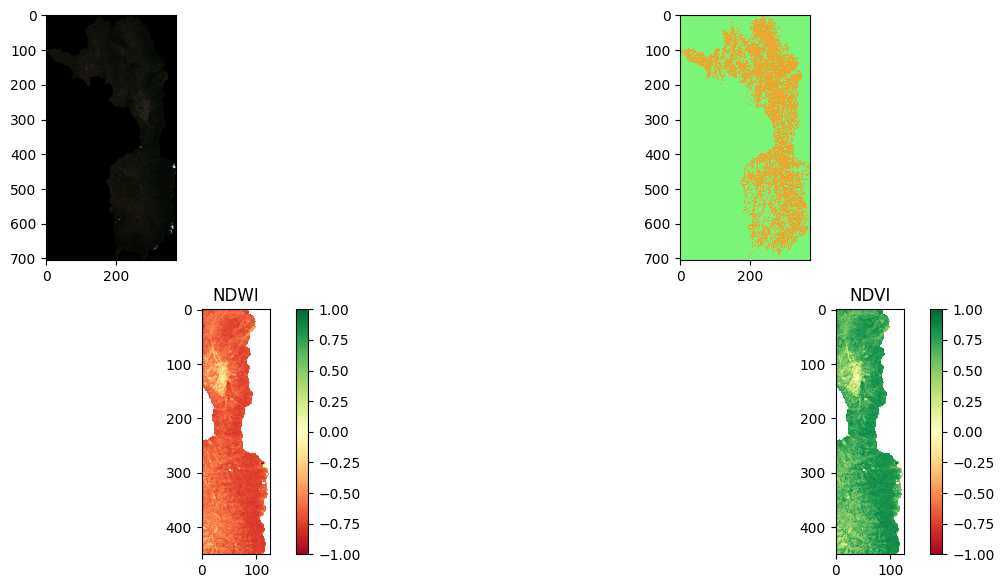

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

img_stretched = color_stretch(reshaped_img, [3, 2, 1])
axs[0, 0].imshow(img_stretched)

axs[0, 1].imshow(class_prediction, cmap=cmap, interpolation='none')

nwdi_plot = axs[1, 0].imshow(ndwi, cmap="RdYlGn")
axs[1, 0].set_title("NDWI")
fig.colorbar(nwdi_plot, ax=axs[1, 0])

ndvi_plot = axs[1, 1].imshow(ndvi, cmap="RdYlGn")
axs[1, 1].set_title("NDVI")
fig.colorbar(ndvi_plot, ax=axs[1, 1])

plt.show()


C:\Users\12758\AppData\Local\Temp\ipykernel_5556\1670099218.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


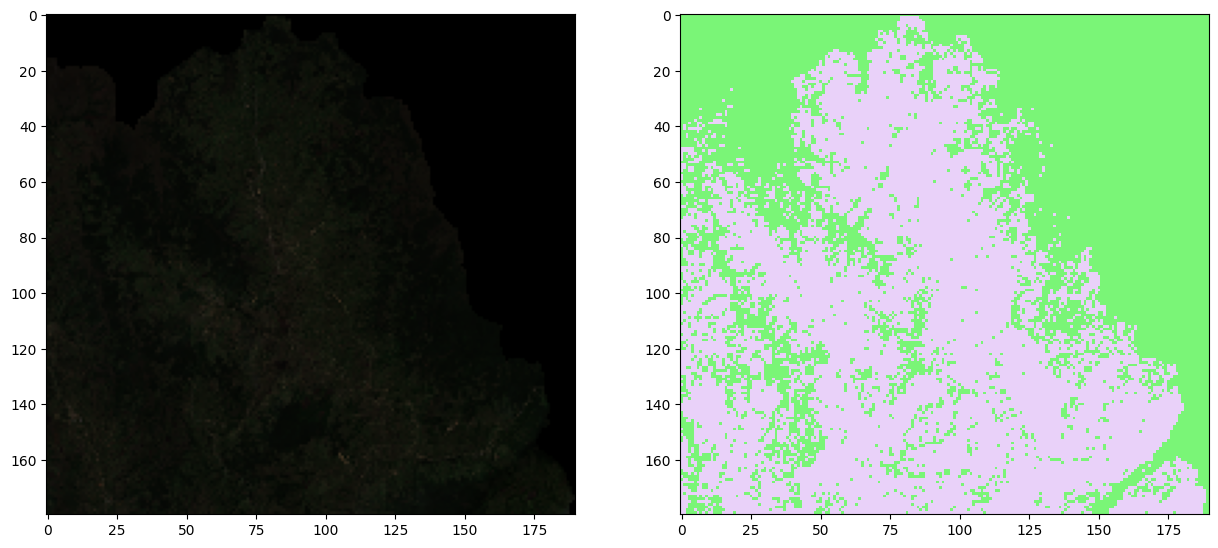

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

img_stretched = color_stretch(reshaped_img, [3, 2, 1])
axs[0].imshow(img_stretched[0:180, 160:350])

axs[1].imshow(class_prediction[0:180, 160:350],
              cmap=cmap, interpolation='none')

fig.show()


c:\Users\12758\anaconda3\envs\land_cover\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


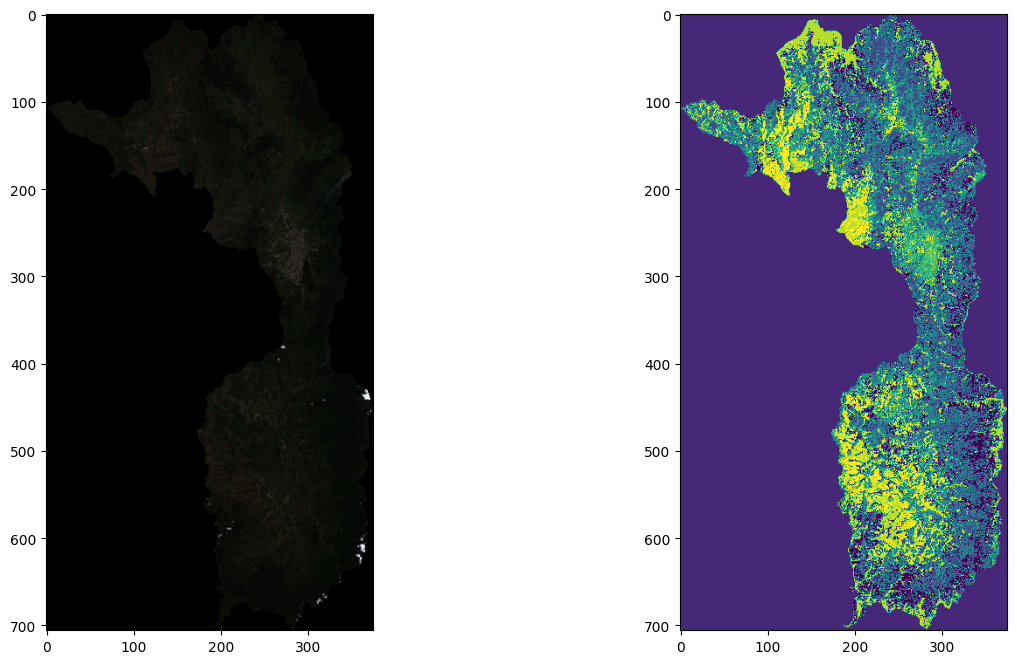

In [ ]:
from sklearn.cluster import KMeans

bands, rows, cols = img.shape

k = 10  # num of clusters

kmeans_predictions = KMeans(n_clusters=k, random_state=0).fit(
    reshaped_img.reshape(-1, 8))

kmeans_predictions_2d = kmeans_predictions.labels_.reshape(rows, cols)

# Now show the classmap next to the image
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

img_stretched = color_stretch(reshaped_img, [3, 2, 1])
axs[0].imshow(img_stretched)

axs[1].imshow(kmeans_predictions_2d)
